In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
# file paths and names

path_input = '/Users/srilakshmi/Desktop/Thesis/Treatment-Control-Assignment/Perc-Flooded-NRT/Cropland/'
name_input_file = 'Perc_Cropland_Flooded.csv'

path_shp = '/Users/srilakshmi/Desktop/Thesis/Data/District-level/Districts-Shapefiles/216distboufinal-v2.shp'

path_output = '/Users/srilakshmi/Desktop/Thesis/Treatment-Control-Assignment/Perc-Flooded-NRT/Cropland/perc_cropland_flooded_shp/'
name_output_csv = 'perc_cropland_flooded.csv'
name_output_file = 'perc_cropland_flooded.shp'


In [3]:
# load total population data
total = pd.read_csv(path_input+name_input_file, header=0)


Region  Perc_Flooded
0                         Kadjebi           0.0
1                        Bia West           0.0
2                     Jaman South           0.0
3      Abura / Asebu / Kwamankese           0.0
4                Cape Coast Metro           0.0
..                            ...           ...
211               La Dade Kotopon           NaN
212  Komenda Edna Eguafo / Abirem           NaN
213                       Jasikan           NaN
214          Ga Central Municipal           NaN
215                      Ashaiman           NaN

[216 rows x 2 columns]

In [4]:
# clean districts shapefile
ghana_dist = gpd.read_file(path_shp)
ghana_dist['DISTRICT'] = ghana_dist['DISTRICT'].str.title()


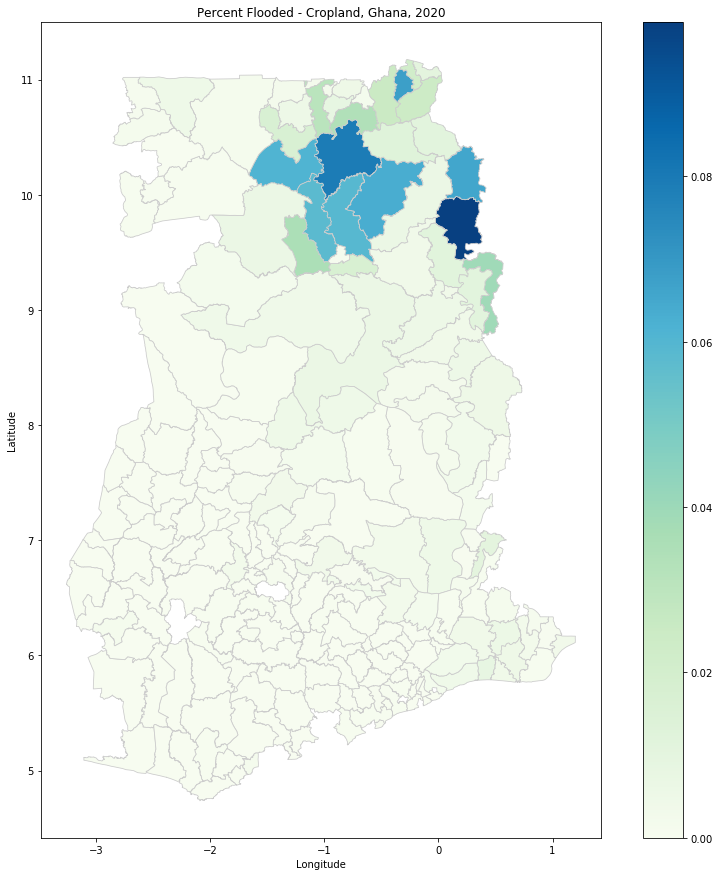

In [5]:
# map using geopandas
merged = ghana_dist.set_index('DISTRICT').join(total.set_index('Region'))
merged.index.name = 'DISTRICT'
merged.reset_index(inplace=True)

merged = merged.sort_values(by=['Perc_Flooded'], ascending=False)

# set a variable that will call whatever column we want to visualise on the map
variable = 'Perc_Flooded'
colorscale = 'GnBu'

# set the range for the choropleth
vmin, vmax = min(merged[variable]), max(merged[variable])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 15))

# create map
merged.plot(column=variable, cmap=colorscale, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Percent Flooded - Cropland, Ghana, 2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sm = plt.cm.ScalarMappable(cmap=colorscale, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

plt.show()



In [6]:
# write to shapefile
merged.to_file(path_output+name_output_file)
